In [1]:
import sys
sys.path.append('../lib/')

from sandpipline import (get_all_rate_file_at_path,  
                         multipage)

from sandpipline import cut_ramps_sci_to_ref, find_ref_for_bandtype
import time as t
import numpy as np
import pickle
from astropy.io import fits
from os.path import isdir
from os import mkdir

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
plt.close("all")
plt.rcParams['text.usetex'] = True

cdpDir = '../DATA/mrs_distortion_fits/'
version = "flt7"

/opt/miniconda3/envs/minds_env/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# %% Read files

# --- Process refs, or read it if algready processed
have_a_save = True
datadir = "../DATA/REFS2/"
# "../DATA/REFSfringe/rate_ref_fringe"
ref_pickel_name = "../DATA/REFS2/rate_ref2"

if have_a_save:

    with open(ref_pickel_name, 'rb') as handle:
        saved_rate_infos = pickle.load(handle)
    cube_frame, centers_list, sigmas_list, dith_type, numdi_list, name_list, bandCHAN = saved_rate_infos

else:
    cube_frame, centers_list, sigmas_list, dith_type, numdi_list, name_list, bandCHAN = get_all_rate_file_at_path(datadir,
                                                                                                                  cdpDir,
                                                                                                                  ref_pickel_name,
                                                                                                                  map3to4=True,
                                                                                                                  v=version,
                                                                                                                  suff="_rate")

In [3]:
# --- Reads the SCI
have_a_save = True
science_data_dir = "../DATA/HKTauB/sci_bfe_fringe_bkg/"
sci_pickel_name = "../DATA/HKTauB_sci_bkg"

if have_a_save:

    with open(sci_pickel_name, 'rb') as handle:
        saved_rate_infos = pickle.load(handle)
    cube_frame_sci, centers_list_sci, sigmas_list_sci, dith_type_sci, numdi_list_sci, name_list_sci, bandCHAN_sci = saved_rate_infos

else:
    cube_frame_sci, centers_list_sci, sigmas_list_sci, dith_type_sci, numdi_list_sci, name_list_sci, bandCHAN_sci = get_all_rate_file_at_path(science_data_dir,
                                                                                                                                              cdpDir,
                                                                                                                                              sci_pickel_name,
                                                                                                                                              map3to4=True,
                                                                                                                                              v=version,
                                                                                                                                              suff="_rate")


# Save in a new folder; create if do not exist
save_dir = science_data_dir[:-2]+"_psfsub/"
if not isdir(save_dir):
    mkdir(save_dir)

['jw03779002001_0310w_00002_mirifulong_rate.fits'
 'jw03779002001_0310k_00002_mirifulong_rate.fits'
 'jw03779002001_0310q_00002_mirifulong_rate.fits'
 'jw03779002001_0310m_00002_mirifulong_rate.fits'
 'jw03779002001_03110_00002_mirifulong_rate.fits'
 'jw03779002001_0310s_00002_mirifulong_rate.fits'
 'jw03779002001_0310o_00002_mirifulong_rate.fits'
 'jw03779002001_0310u_00002_mirifulong_rate.fits'
 'jw03779002001_0310y_00002_mirifulong_rate.fits']
-1.0 -1.0
4 1
-1.0 -1.0
4 1
-1.0 -1.0
4 1


/Users/sand-jrd/PSF-SUBTRACTION-MINDS/STEP4-PSFsub/../lib/sandpipline.py:943: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


-1.0 -1.0
4 1
-1.0 -1.0
4 1
-1.0 -1.0
4 1
-1.0 -1.0
4 1
-1.0 -1.0
4 1
-1.0 -1.0
4 1
['jw03779004001_24101_00003_mirifulong_rate.fits'
 'jw03779004001_32101_00003_mirifulong_rate.fits'
 'jw03779004001_34101_00003_mirifulong_rate.fits'
 'jw03779004001_22101_00003_mirifulong_rate.fits'
 'jw03779004001_30101_00003_mirifulong_rate.fits'
 'jw03779004001_26101_00003_mirifulong_rate.fits'
 'jw03779004001_38101_00003_mirifulong_rate.fits'
 'jw03779004001_28101_00003_mirifulong_rate.fits'
 'jw03779004001_36101_00003_mirifulong_rate.fits']
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1


/Users/sand-jrd/PSF-SUBTRACTION-MINDS/STEP4-PSFsub/../lib/sandpipline.py:943: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
['jw03779006001_0310w_00001_mirifulong_rate.fits'
 'jw03779006001_0310k_00001_mirifulong_rate.fits'
 'jw03779006001_0310q_00001_mirifulong_rate.fits'
 'jw03779006001_0310m_00001_mirifulong_rate.fits'
 'jw03779006001_03110_00001_mirifulong_rate.fits'
 'jw03779006001_0310s_00001_mirifulong_rate.fits'
 'jw03779006001_0310o_00001_mirifulong_rate.fits'
 'jw03779006001_0310u_00001_mirifulong_rate.fits'
 'jw03779006001_0310y_00001_mirifulong_rate.fits']
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
0.0 -2.0
4 1
['jw03779006001_0310w_00004_mirifulong_rate.fits'
 'jw03779006001_0310k_00004_mirifulong_rate.fits'
 'jw03779006001_0310q_00004_mirifulong_rate.fits'
 'jw03779006001_0310m_00004_mirifulong_rate.fits'
 'jw03779006001_0310s_00004_mirifulong_rate.fits'
 'jw03779006001_03110_00004_mirifulong_rate.fits'
 'jw03779006001_0310o_00004_mirifulong_rate.fits'
 'jw

OSError: Empty or corrupt FITS file

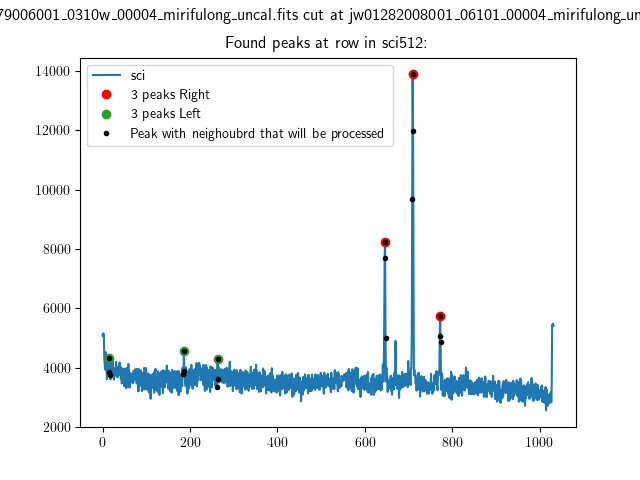

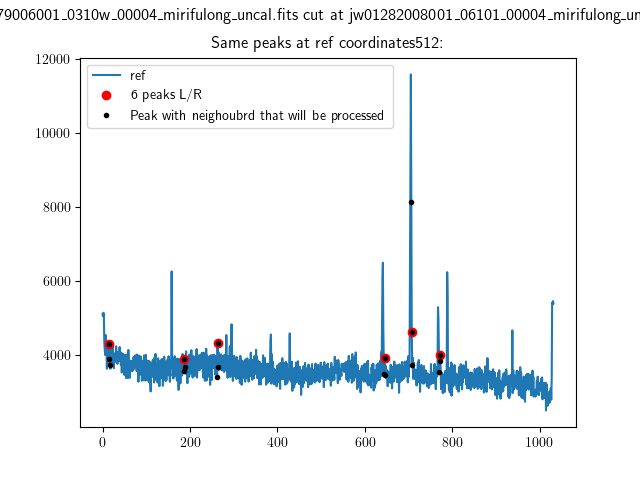

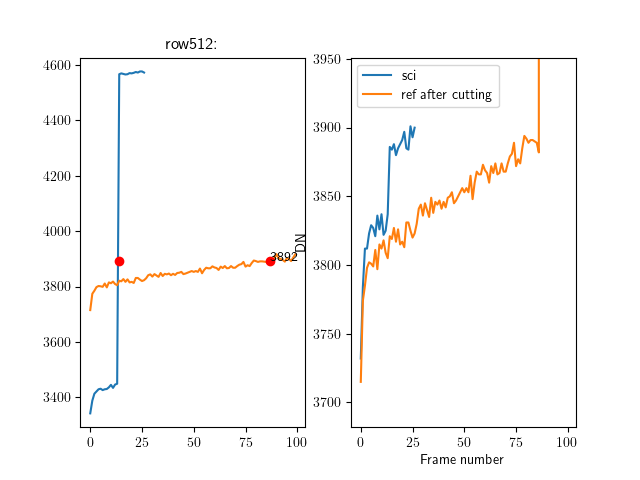

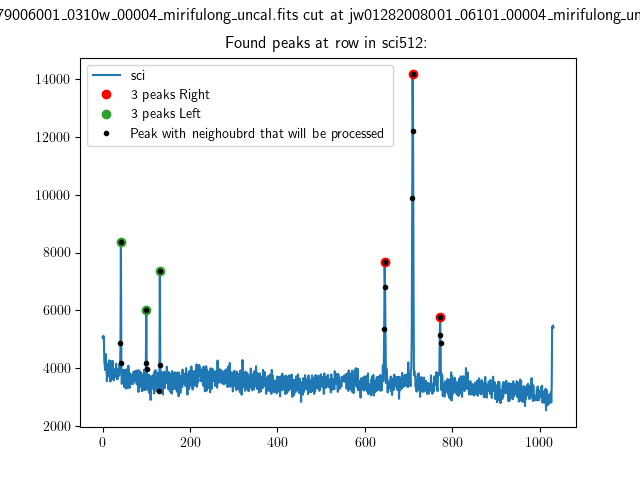

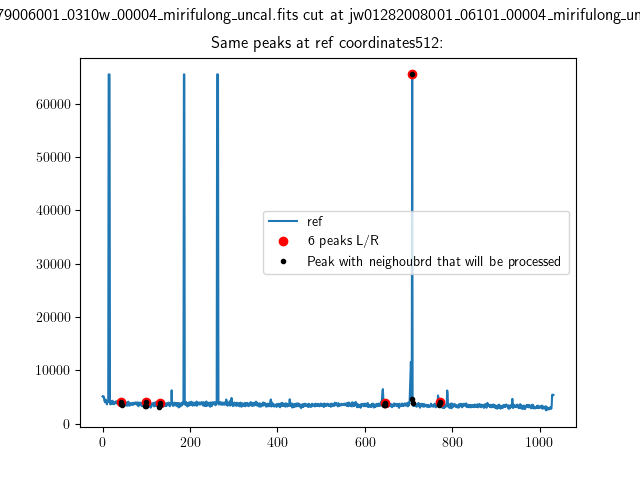

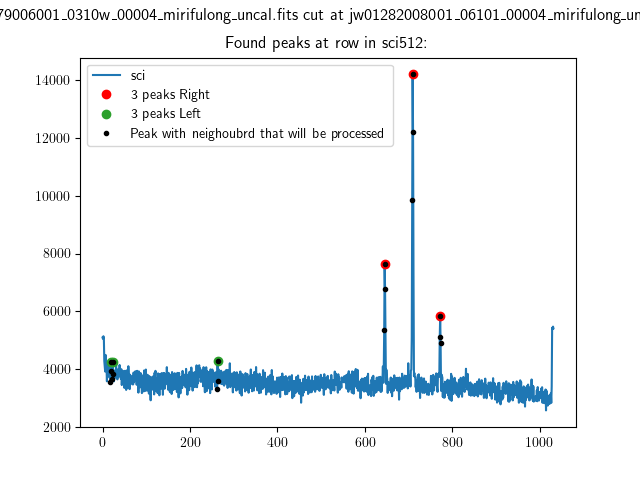

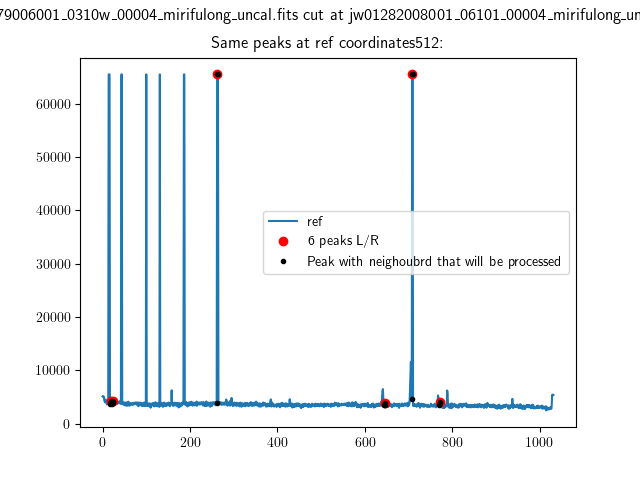

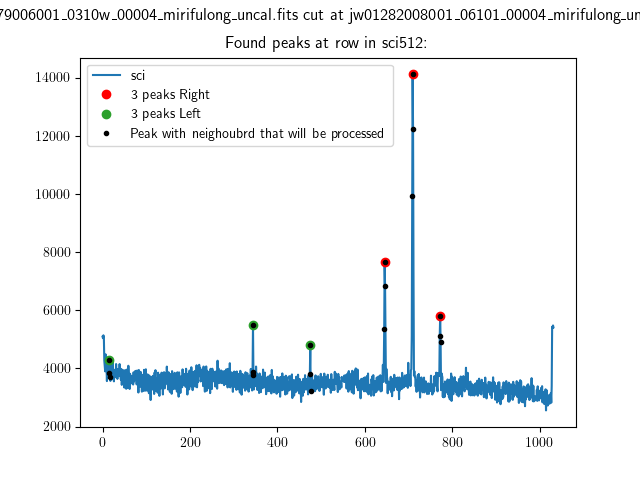

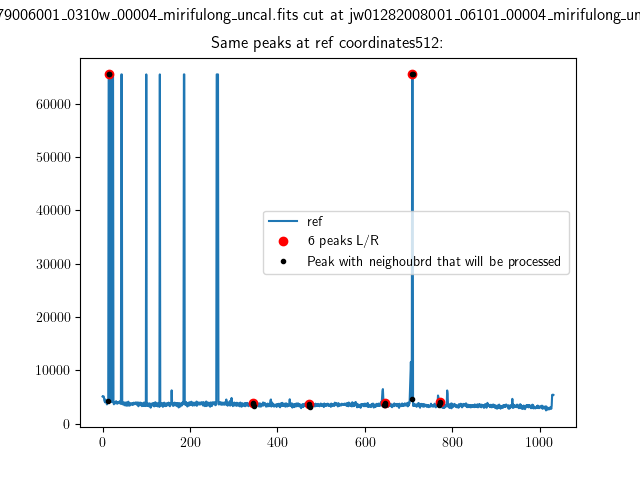

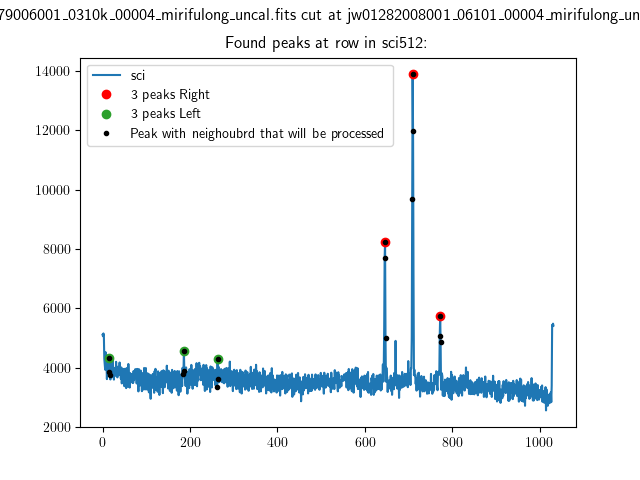

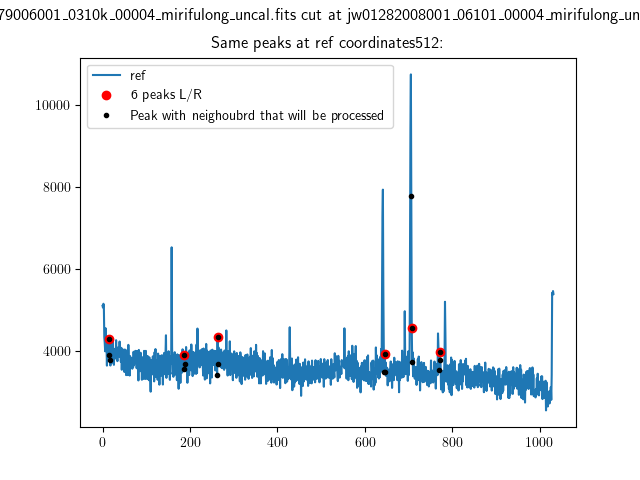

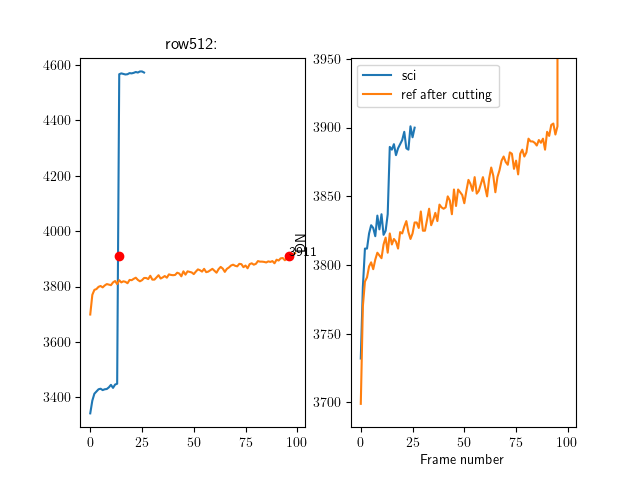

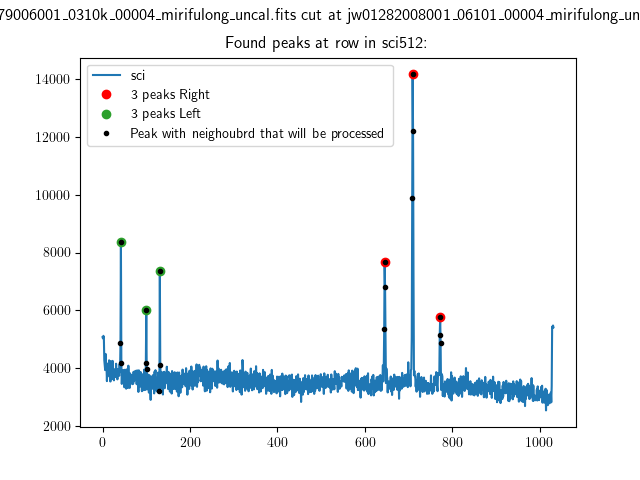

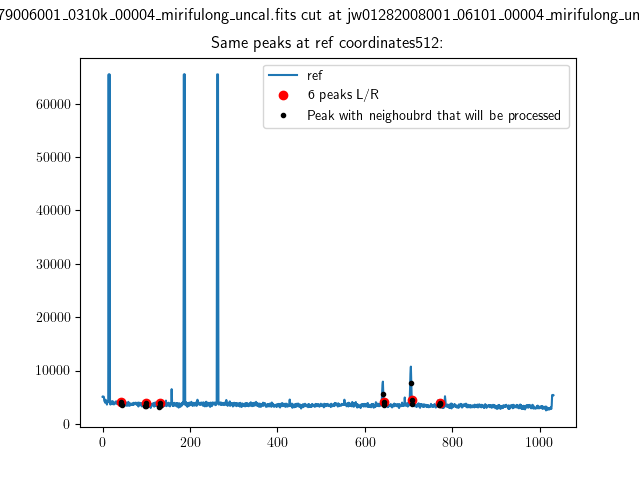

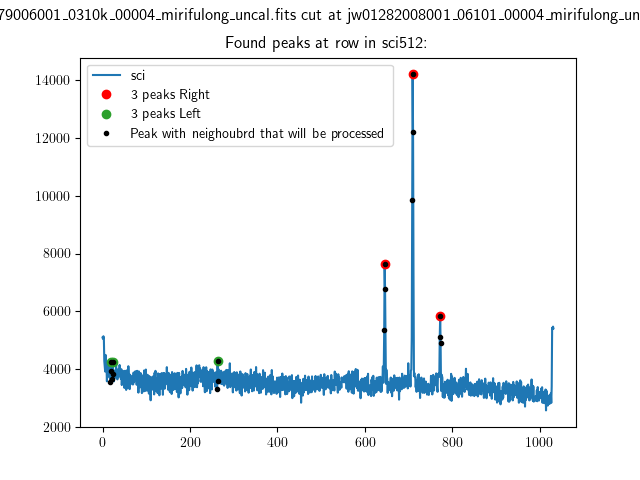

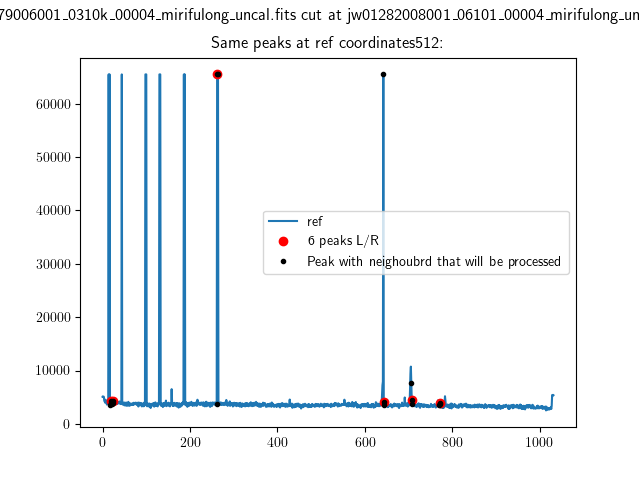

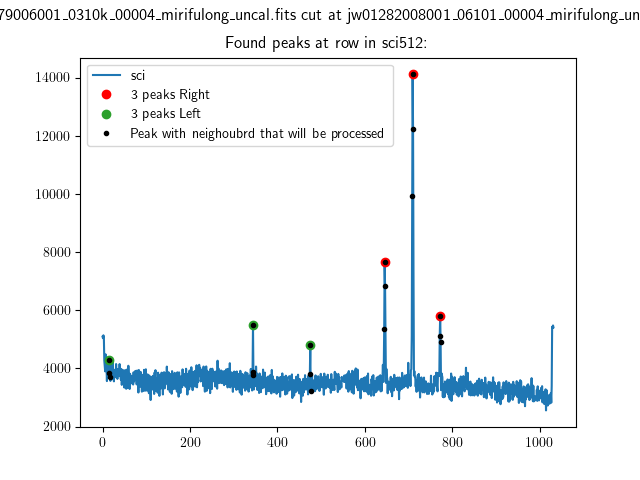

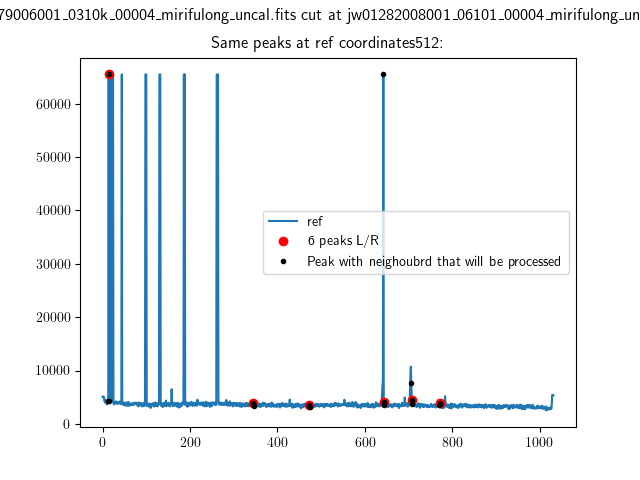

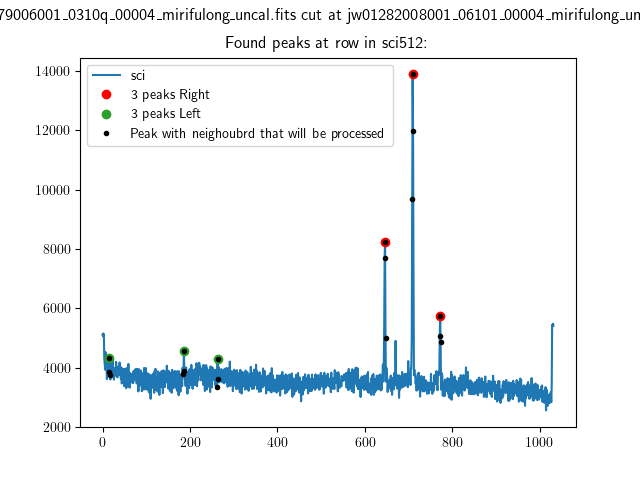

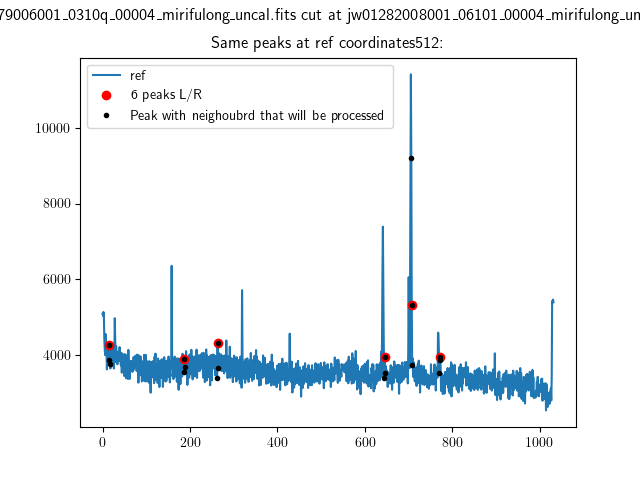

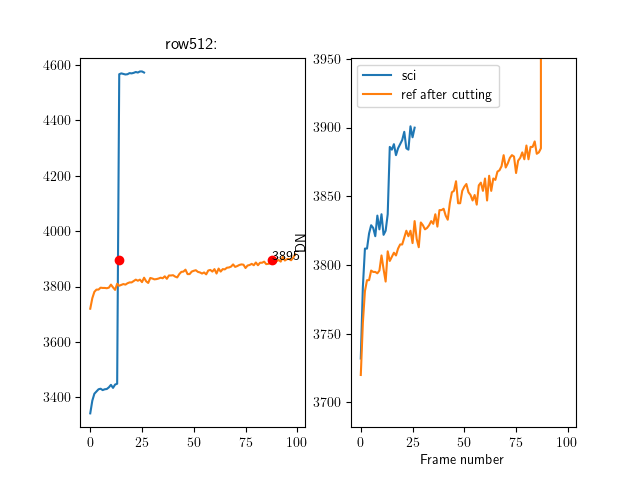

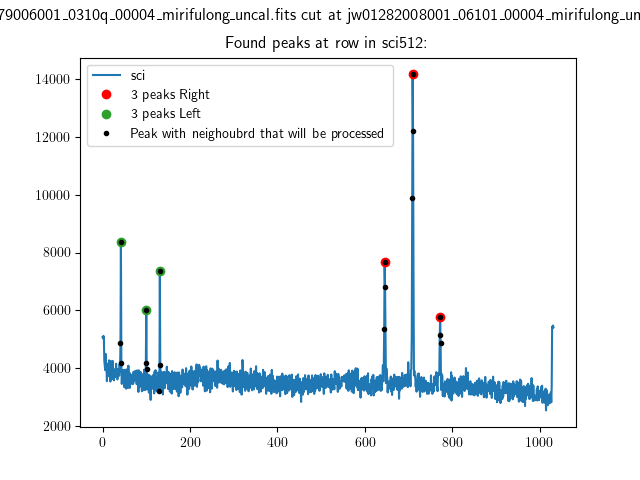

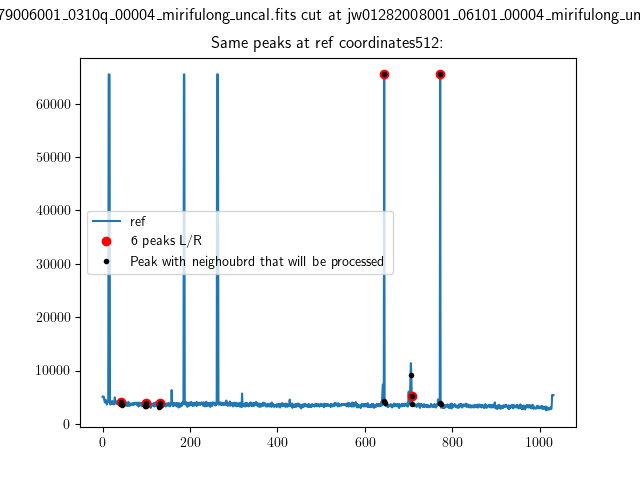

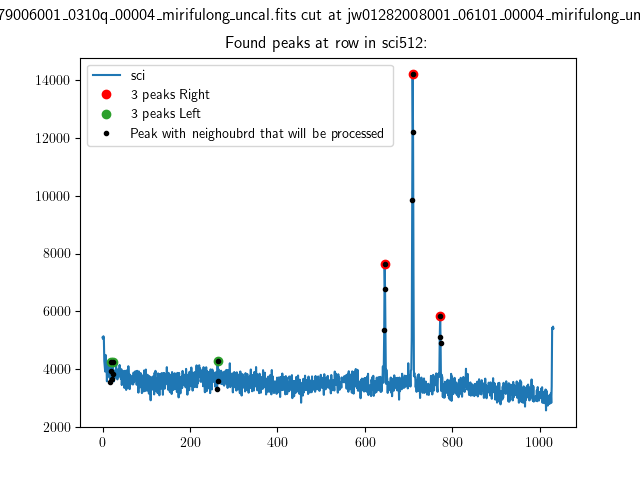

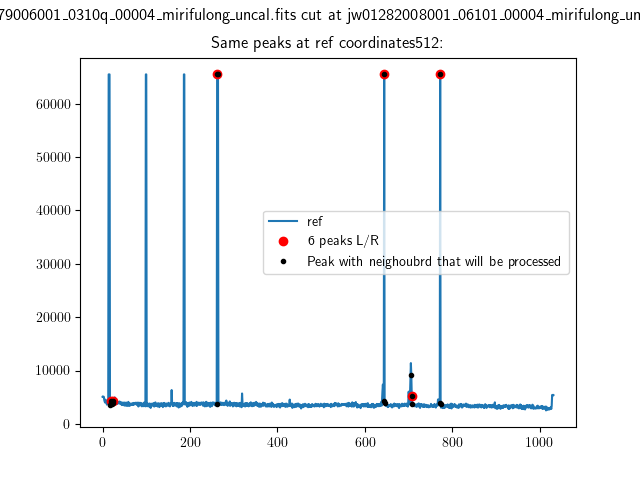

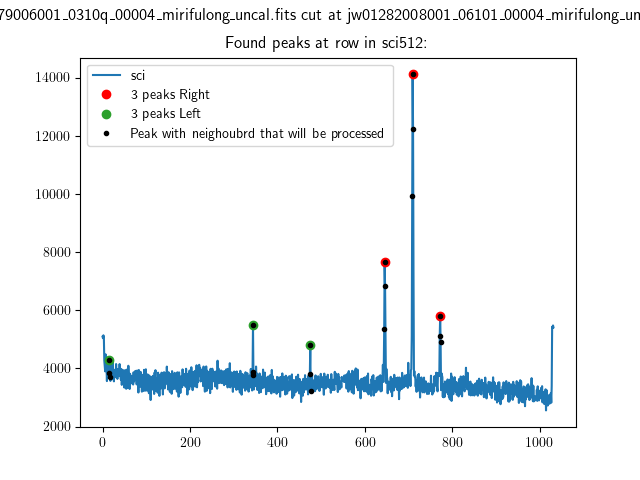

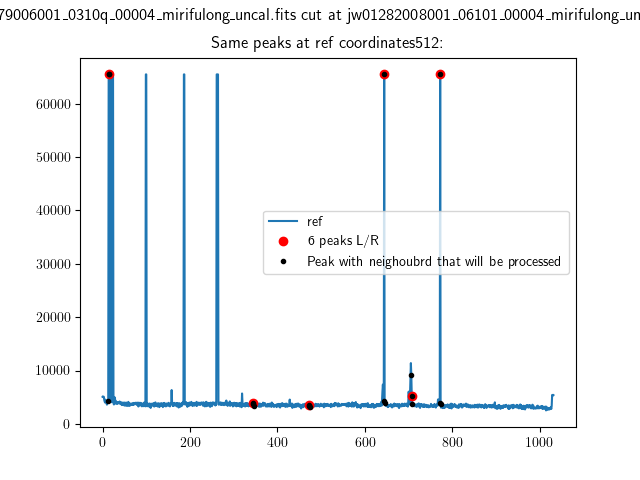

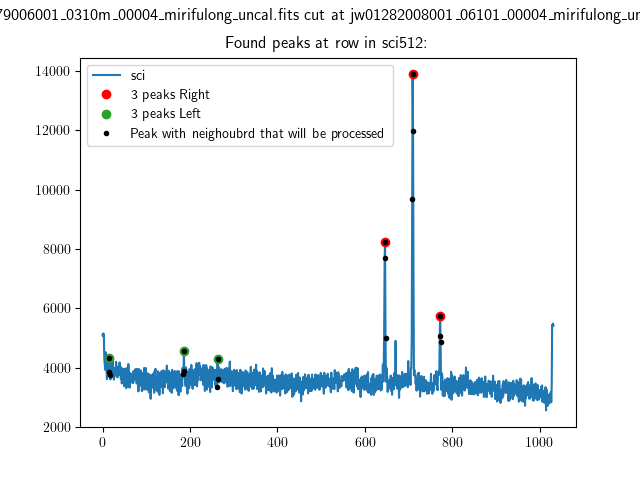

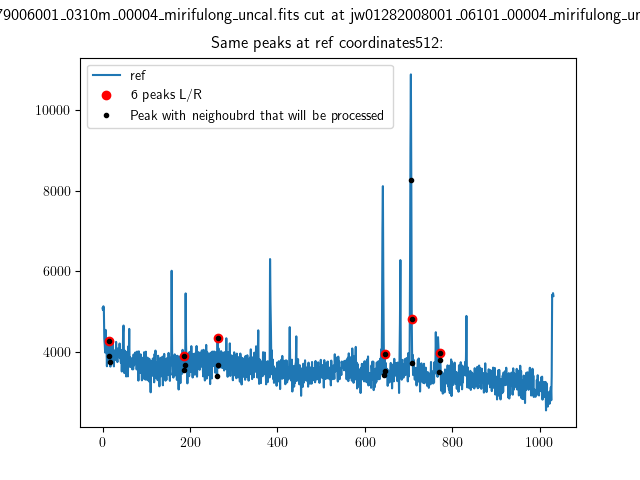

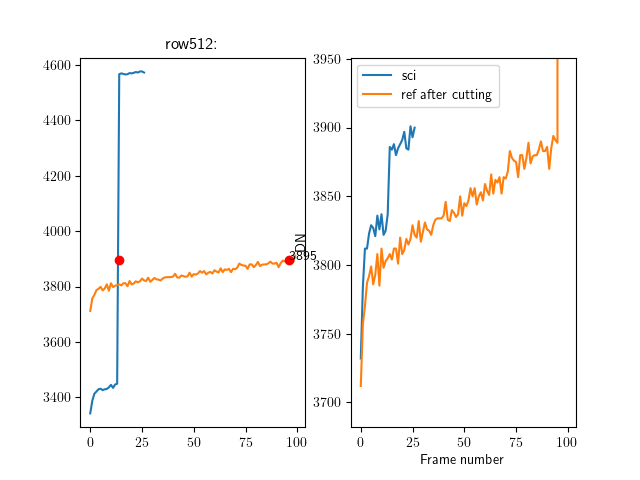

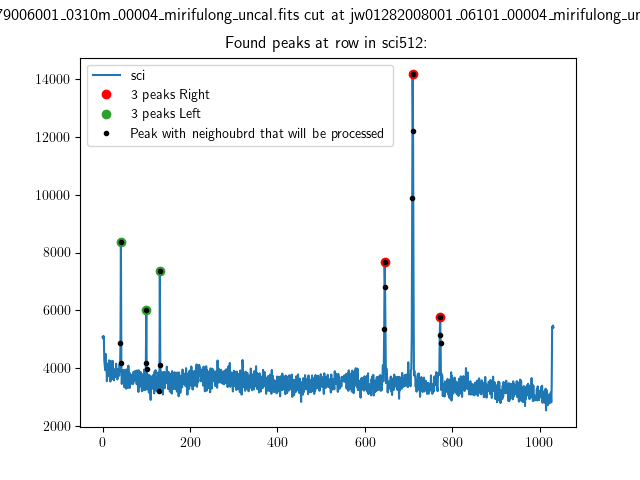

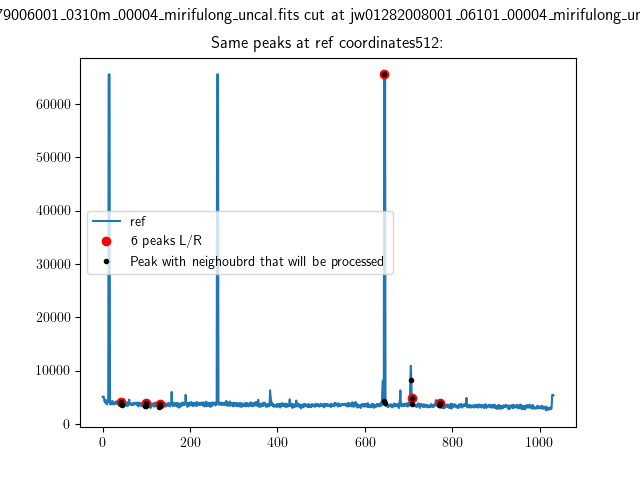

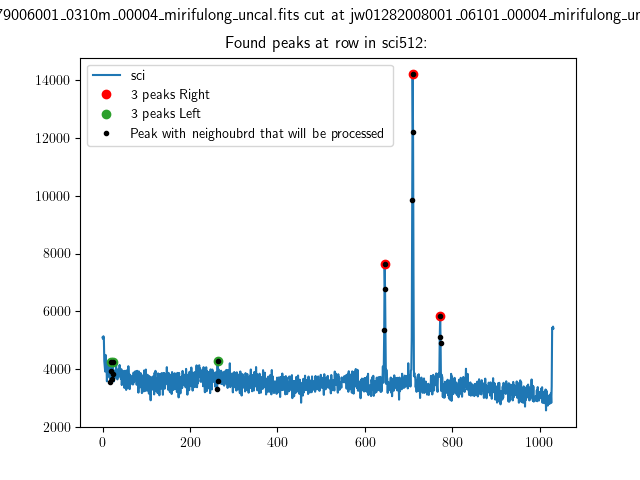

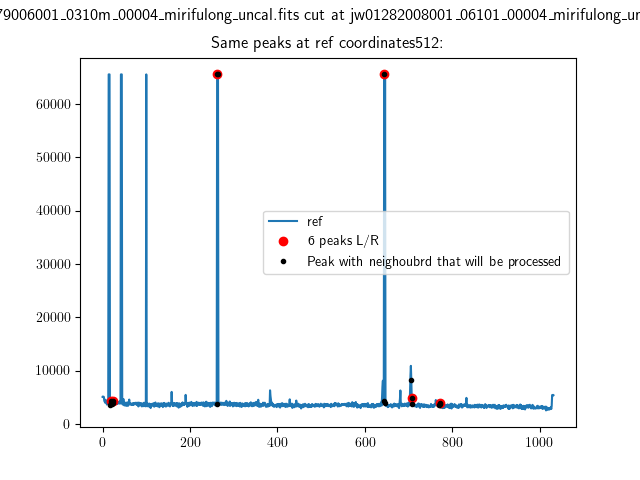

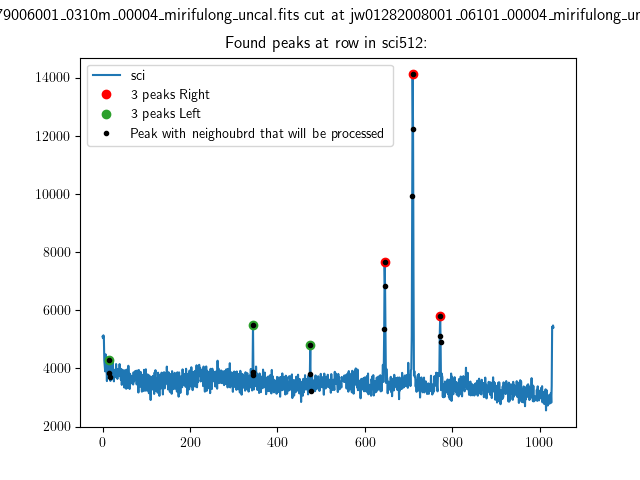

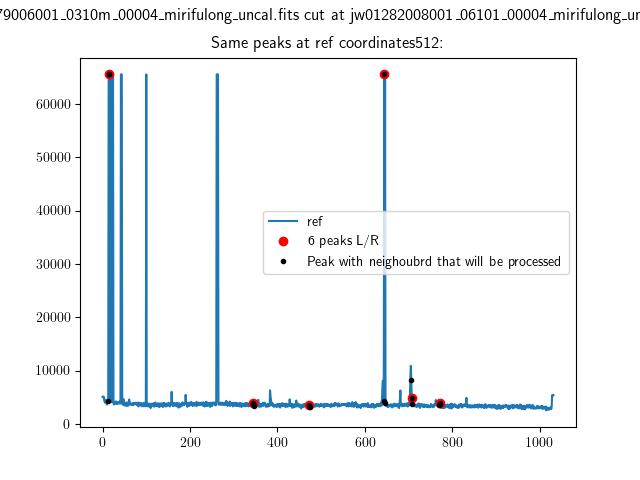

In [4]:
# Processing of uncals refs for cutting the ramps.

path_ref = "../DATA/10Lac/10Lac_uncal/"
path_sci = "../DATA/HKTauB/uncal/"
outdirsci = "../DATA/10Lac/10Lac_uncal_HKTauB/"
outdirref = "../DATA/HKTauB/uncal_cut10Laccut/"

for kk in range(len(cube_frame_sci)):

    # We select one frame from the list of science rate file to process.
    frame_sci = cube_frame_sci[kk]
    type_sci = dith_type_sci[kk]
    centers_sci = centers_list_sci[kk]
    sci_name = name_list_sci[kk]
    bandsci = bandCHAN_sci[kk]
    sigmas_sci = sigmas_list_sci[kk]
    # Value used to convert alpha shift into pixel displacement
    MRS_alphapix = {'1': 0.196, '2': 0.196, '3': 0.245, '4': 0.273}

    if "4" in bandsci:
        cube_frame_band_i, centers_band_i, sigmas_list_i, numdi_band_type_i, name_list_band_i = find_ref_for_bandtype(
            bandsci,
            type_sci,
            cube_frame,
            centers_list,
            sigmas_list,
            dith_type,
            numdi_list,
            bandCHAN,
            name_list)
        
        print(name_list_band_i)
        for ref_name in name_list_band_i :
            
            (shiftx_l,shifty_l), (shiftx_r,shifty_r) = centers_sci
            id_ref = list(name_list_band_i).index(ref_name)
            (shiftx_l_ref,shifty_l), (shiftx_ref,shifty_r_ref) = centers_band_i[id_ref]
            execpted_shift_l = shiftx_l_ref-shiftx_l * 0.273
            execpted_shift_r = shiftx_ref-shiftx_r * 0.245
            print(np.floor(execpted_shift_l),np.floor(execpted_shift_r))
            
            cut_ramps_sci_to_ref(path_ref, ref_name.replace("rate", "uncal"), path_sci, sci_name.replace("rate", "uncal"), outdirref, outdirsci, shift_peak=(execpted_shift_l,execpted_shift_r), show=True)
    
    multipage(save_dir[:-1]+sci_name+"ramp"+".pdf")
    plt.close("all")